# Simple Linear Regression
In this notebook we will use data on house sales in King County to predict house prices using simple (one input) linear regression. We will:
1. Use python functions to compute important summary statistics
2. Write a function to compute the Simple Linear Regression weights using the closed form solution
3. Write a function to make predictions of the output given the input feature
4. Turn the regression around to predict the input given the output
5. Compare two different models for predicting house prices

Import Pandas (a python data analysis library), Numpy (a maths library), train_test_split from sklearn.cross_validation and matplotlib for data plotting

In [67]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

## Load house sales data
Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

Read data from csv file and put in dataframe.

In [28]:
sales = pd.read_csv('data/kc_housing_sales_data.csv')
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [29]:
# print the shape of the DataFrame
sales.shape

(21613, 21)

## Visualize the data using matplotlib

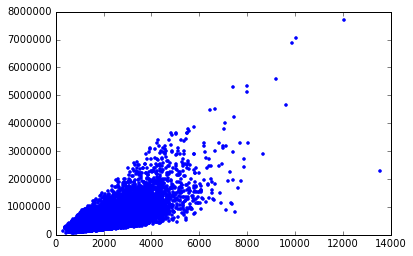

In [38]:
plt.plot(sales['sqft_living'],sales['price'],'.')

Print dataframe

In [5]:
#print sales
#sales

## Split data into training and testing
Split the data in train data and test data (80:20) ratio

In [15]:
train_data,test_data = train_test_split(sales, test_size = 0.2)

## Define cutom simple linear regression function

In [11]:
def simple_linear_regression(input_feature, output):
    x = input_feature
    y = output
    w1 = (((x * y).sum() - y.sum() * x.mean()) / ((x*x).sum() - x.sum() * x.mean()))
    w0 = (y - w1 * x).mean()
    
    # use the formula for the slope
    
    # use the formula for the intercept
        
    #return (intercept, slope)
    return (w0, w1)

In [18]:
sqft_intercept, sqft_slope = simple_linear_regression(train_data['sqft_living'], train_data['price'])
br_intercept, br_slope = simple_linear_regression(train_data['bedrooms'], train_data['price'])

In [13]:
print sqft_intercept, sqft_slope

-43980.798498 280.402184823


## Predicting Values
We can make predictions as we have now model parameters: intercept & slope.

Define a method for predictions:

In [16]:
def get_regression_predictions(input_feature, intercept, slope):
    # calculate the predicted values:
    predicted_values = intercept + slope * input_feature
    
    return predicted_values

In [53]:
my_house_sqft = 2650
estimated_price = get_regression_predictions(my_house_sqft, sqft_intercept, sqft_slope)
print "The estimated price for a house with %d squarefeet is $%.2f" % (my_house_sqft, estimated_price)

my_house_br = 6
estimated_price_br = get_regression_predictions(my_house_br, br_intercept, br_slope)
print "The estimated price for a house with %d bedroom is $%.2f" % (my_house_br, estimated_price_br)

The estimated price for a house with 2650 squarefeet is $697140.74
The estimated price for a house with 6 bedroom is $855845.81


## Residual Sum of Squares
Evaluate our model using Residual Sum of Squares (RSS). 

RSS is the sum of the squares of the residuals. Residuals is the difference between the predicted output and the true output.

Function to compute the RSS of a simple linear regression model given the input_feature, output, intercept and slope:

In [24]:
def get_residual_sum_of_squares(input_feature, output, intercept, slope):
    # First get the predictions
    predictions = intercept + slope * input_feature
    #print predictions
    # then compute the residuals (since we are squaring it doesn't matter which order you subtract)
    RSS = sum((predictions - output) * (predictions - output))

    # square the residuals and add them up

    return(RSS)

### Test your Linear Regression Algorithm
What is the RSS for the simple linear regression using squarefeet model to predict prices on TRAINING data?

What is the RSS for the simple linear regression using bedroom model to predict prices on TRAINING data?

In [118]:
rss_prices_on_sqft = get_residual_sum_of_squares(train_data['sqft_living'], train_data['price'], sqft_intercept, sqft_slope)
print 'The RSS of predicting Prices based on Square Feet is : ' + str(rss_prices_on_sqft)

rss_prices_on_br = get_residual_sum_of_squares(train_data['bedrooms'], train_data['price'], br_intercept, br_slope)
print 'The RSS of predicting Prices based on bedroom is : ' + str(rss_prices_on_br)

The RSS of predicting Prices based on Square Feet is : 1.15836453562e+15
The RSS of predicting Prices based on bedroom is : 2.05924090024e+15


As the RSS of squarefeet model is less than the RSS of bedroom model, the model based on squarefeet feature will predict better.

### Visualize the squarefoot model

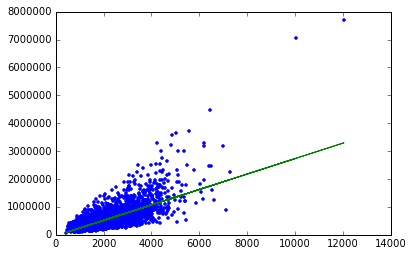

In [55]:
plt.plot(test_data['sqft_living'],test_data['price'],'.', test_data['sqft_living'], get_regression_predictions(test_data['sqft_living'], sqft_intercept, sqft_slope), '-')

### Visualize the bedroom model

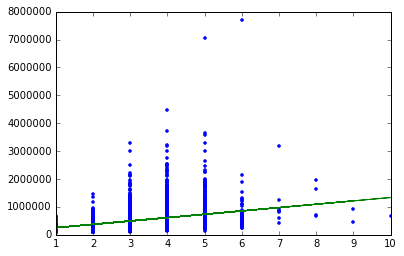

In [57]:
plt.plot(test_data['bedrooms'],test_data['price'],'.', test_data['bedrooms'], get_regression_predictions(test_data['bedrooms'], br_intercept, br_slope), '-')

## Inverse regression estimate
Predict the squarefeet given price.  

Function to predict the input_feature given the output:

In [26]:
def inverse_regression_predictions(output, intercept, slope):
    # solve output = intercept + slope*input_feature for input_feature. Use this equation to compute the inverse predictions:
    estimated_feature = (output - intercept)/slope
    return estimated_feature

What is the estimated square-feet for a house costing $900,000?

In [27]:
my_house_price = 900000
estimated_squarefeet = inverse_regression_predictions(my_house_price, sqft_intercept, sqft_slope)
print "The estimated squarefeet for a house worth $%.2f is %d" % (my_house_price, estimated_squarefeet)

The estimated squarefeet for a house worth $900000.00 is 3383


## Linear Regression in scikit-learn¶

### Create the linear regression model using 'sqft_living' as feature

In [121]:
# create X and y
feature_cols = ['sqft_living']
X = train_data[feature_cols]
y = train_data.price

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm_sqft_living = LinearRegression()
lm_sqft_living.fit(X, y)

# print intercept and coefficients
print lm_sqft_living.intercept_
print lm_sqft_living.coef_

-36064.9773437
[ 276.68140224]


In [122]:
# pair the feature names with the coefficients
zip(feature_cols, lm_sqft_living.coef_)

[('sqft_living', 276.68140224337128)]

In [123]:
# predict for a new observation
X_test = test_data[feature_cols]

lm_sqft_living.predict(X_test)

array([  390024.38211113,  1361176.10398537,   520064.64116552, ...,
         456427.91864954,   697140.73860128,   226782.35478754])

In [125]:
# calculate the R-squared
lm_sqft_living.score(X, y)

0.491068043906283

#### Visualize the prediction

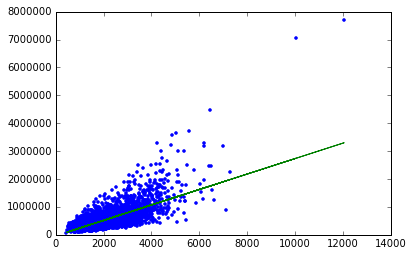

In [93]:
feature_cols = ['sqft_living']
X = test_data[feature_cols]
y = test_data.price
plt.plot(X, y,'.', X, lm_sqft_living.predict(X), '-')

### Create the linear regression model using 'bedrooms' as feature

In [127]:
# create X and y
feature_cols = ['bedrooms']
X = train_data[feature_cols]
y = train_data.price

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm_bedrooms = LinearRegression()
lm_bedrooms.fit(X, y)

# print intercept and coefficients
print lm_bedrooms.intercept_
print lm_bedrooms.coef_

134519.425595
[ 120221.06412667]


In [128]:
# pair the feature names with the coefficients
zip(feature_cols, lm_bedrooms.coef_)

[('bedrooms', 120221.0641266723)]

In [129]:
# predict for a new observation
lm_bedrooms.predict(6)

array([ 855845.81035467])

In [131]:
# calculate the R-squared
lm_bedrooms.score(X, y)

0.095264515442283093

#### Visualize the prediction

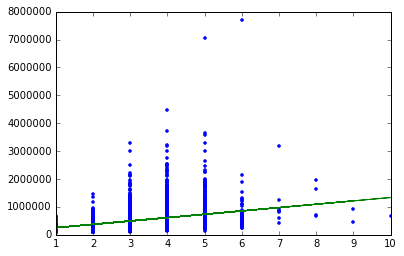

In [94]:
feature_cols = ['bedrooms']
X = test_data[feature_cols]
y = test_data.price
plt.plot(X, y,'.', X, lm_bedrooms.predict(X), '-')